# **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---

## **Aula Prática 5 - Parte 4:** $\underline{Plotando\ e\ Analisando\ Relâmpagos\ Estimados\ pelo\ Satélite\ GOES-16}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como trabalhar com dados de relâmpagos estimado por satélite. Para isto usaremos os dados do sensor [Geostationary Lightning Mapper (GLM)](https://space.oscar.wmo.int/instruments/view/glm) abordo do satélite [Geostationary Operational Environmental Satellite - 16 (GOES-16)](https://space.oscar.wmo.int/satellites/view/goes_16). O objetivo dessa **Parte 4** é aprender como plotar e analisar a série temporal mensal e anual de relâmpagos para um determinado Estado do Brasil.

---


**DADOS DE ENTRADA**: Arquivos de relâmpagos.

1. $\underline{Dados\ de\ Relâmpagos}$: sensor GLM do satélite GOES-16
- **Tipo do dado:** matriz de 1664 linhas por 1664 colunas
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** flash_goes16_mensal_2018-01.nc
- **Fonte dos dados:** Gerado pelo Prof. Enrique Mattos


---

**DADOS DE SAÍDA:** .
- **Tipo do dado:** Figura
- **Formato do dado:** arquivos JPG
- **Imagens geradas:**
    1. Fig_1_serie_temporal_total_MG.jpg
    2. Fig_2_serie_temporal_mensal_MG.jpg
    3. Fig_3_serie_temporal_anual_MG.jpg
---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Monta o google drive
3.   Define o caminho do google drive
4.   Importação das bibliotecas
5.   PARTE 1): Baixando e lendo o shapefile de um determinado Estado do Brasil
6.   PARTE 2): Leitura e tratamento do dado mensal
7.   PARTE 3): Mensal
8.   PARTE 4): Anual

---
**OBSERVAÇÕES IMPORTANTES**:
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive

---
- **Realizado por:** Enrique V. Mattos - 18/05/2022
- **Atualizado por:** Enrique V. Mattos - 06/09/2022


---


# **1° Passo:** Instalando as bibliotecas

In [ ]:
# Instalando o proplot (usado para gerar Mapas também)
!pip install -q proplot

Chegando aqui, será necessário fazer a **Reinicialização do Ambiente de Execução** (acessar *Ambiente de execução* que esta na barra de ferramentas e clicar em *Reiniciar Ambiente de Execução* e rodar novamente a célula anterior de instalações) e ter que instalar todos os pacotes de novo. Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab, então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

In [ ]:
# Instalando a biblioteca Salem
!pip install rasterio -q
!pip install pyproj -q
!pip install geopandas -q
!pip install salem -q
!pip install descartes -q

# **2° Passo:** Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3° Passo:** Caminho do diretório

In [ ]:
dir = '/content/drive/MyDrive/1-AULAS/2022.2/CAT010 - PYTHON PARA SATELITES METEOROLOGICOS/AULA_05_RELAMPAGOS/'

# **4° Passo:** Importando as bibliotecas

In [ ]:
import proplot as plot
import numpy as np
import salem
import xarray as xr
import glob

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/proplot/config.py:1454: ProPlotWarning: Rebuilding font cache.


# **PARTE 1)**: Baixando e lendo o shapefile de um determinado Estado do Brasil

**Baixando o shapefile**

In [ ]:
# sigla do estado
sigla_estado = 'MG'

In [ ]:
# caminho completo do arquivo
filename = f'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/{sigla_estado}/{sigla_estado.lower()}_unidades_da_federacao.zip'

# baixa o shapefile
!wget -c {filename}

# Descomprimindo o arquivo
name = f'/content/{sigla_estado.lower()}_unidades_da_federacao.zip'
!unzip -o {name}

--2022-11-22 17:49:54--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/MG/mg_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 363466 (355K) [application/zip]
Saving to: ‘mg_unidades_da_federacao.zip’

mg_unidades_da_fede 100%[===================>] 354.95K   714KB/s    in 0.5s    

2022-11-22 17:49:56 (714 KB/s) - ‘mg_unidades_da_federacao.zip’ saved [363466/363466]

Archive:  /content/mg_unidades_da_federacao.zip
 extracting: MG_UF_2019.cpg          
  inflating: MG_UF_2019.dbf          
  inflating: MG_UF_2019.prj          
  inflating: MG_UF_2019.shp          
  inflating: MG_UF_2019.shx          


**Leitura do shapefile**

In [ ]:
# leitura do shapefile com a biblioteca SALEM
shp = salem.read_shapefile(f'/content/{sigla_estado}_UF_2019.shp')

In [ ]:
# mostra o shapefile que foi lido
shp

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry,min_x,max_x,min_y,max_y
0,31,Minas Gerais,MG,Sudeste,"POLYGON ((-50.74208 -19.21384, -50.74241 -19.2...",-51.046082,-39.856829,-22.922755,-14.233181


# **PARTE 2)**: Leitura e tratamento do dado mensal

**Monta lista dos arquivos**

In [ ]:
# arquivos de 2018
files_2018 = sorted(glob.glob(f'{dir}input/mensal/2018/*nc'))

# arquivos de 2019
files_2019 = sorted(glob.glob(f'{dir}input/mensal/2019/*nc'))

# arquivos de 2020
files_2020 = sorted(glob.glob(f'{dir}input/mensal/2020/*nc'))

# arquivos de 2021
files_2021 = sorted(glob.glob(f'{dir}input/mensal/2021/*nc'))

# lista com todos arquivos
files = files_2018 + files_2019 + files_2020 + files_2021

# mostra na tela a lista de arquivos completa
files

['/content/drive/MyDrive/1-AULAS/2022.2/CAT010 - PYTHON PARA SATELITES METEOROLOGICOS/AULA_05_RELAMPAGOS/input/mensal/2018/flash_goes16_mensal_2018-01.nc',
 '/content/drive/MyDrive/1-AULAS/2022.2/CAT010 - PYTHON PARA SATELITES METEOROLOGICOS/AULA_05_RELAMPAGOS/input/mensal/2018/flash_goes16_mensal_2018-02.nc',
 '/content/drive/MyDrive/1-AULAS/2022.2/CAT010 - PYTHON PARA SATELITES METEOROLOGICOS/AULA_05_RELAMPAGOS/input/mensal/2018/flash_goes16_mensal_2018-03.nc',
 '/content/drive/MyDrive/1-AULAS/2022.2/CAT010 - PYTHON PARA SATELITES METEOROLOGICOS/AULA_05_RELAMPAGOS/input/mensal/2018/flash_goes16_mensal_2018-04.nc',
 '/content/drive/MyDrive/1-AULAS/2022.2/CAT010 - PYTHON PARA SATELITES METEOROLOGICOS/AULA_05_RELAMPAGOS/input/mensal/2018/flash_goes16_mensal_2018-05.nc',
 '/content/drive/MyDrive/1-AULAS/2022.2/CAT010 - PYTHON PARA SATELITES METEOROLOGICOS/AULA_05_RELAMPAGOS/input/mensal/2018/flash_goes16_mensal_2018-06.nc',
 '/content/drive/MyDrive/1-AULAS/2022.2/CAT010 - PYTHON PARA SAT

**Leitura do dado**

In [ ]:
# leitura do dado
flash_por_mes = xr.open_mfdataset(files, concat_dim='time', combine='nested')

In [ ]:
# mostrando os dados
flash_por_mes

<xarray.Dataset>
Dimensions:  (time: 48, lat: 1664, lon: 1664)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2021-12-31
  * lat      (lat) float32 -66.56 -66.48 -66.4 -66.32 ... 66.24 66.32 66.4 66.48
  * lon      (lon) float32 -141.6 -141.5 -141.4 -141.3 ... -8.68 -8.6 -8.52
Data variables:
    flash    (time, lat, lon) float32 dask.array<chunksize=(1, 1664, 1664), meta=np.ndarray>

In [ ]:
# mostrando os tempos
flash_por_mes['time']

**Aplica mascara e divide o dado por 64**

In [ ]:
flash_por_mes['flash'] = (flash_por_mes['flash']/64.).salem.roi(shape=shp)

# **PARTE 3)**: Análise Mensal

##**Gerando estatísticas**

In [ ]:
# mostra o dado que será utilizado
flash_por_mes

<xarray.Dataset>
Dimensions:  (time: 48, lat: 1664, lon: 1664)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2021-12-31
  * lat      (lat) float32 -66.56 -66.48 -66.4 -66.32 ... 66.24 66.32 66.4 66.48
  * lon      (lon) float32 -141.6 -141.5 -141.4 -141.3 ... -8.68 -8.6 -8.52
Data variables:
    flash    (time, lat, lon) float32 dask.array<chunksize=(1, 1664, 1664), meta=np.ndarray>

In [ ]:
# fazendo a soma em área
serie_temporal_mensal = flash_por_mes.sum(('lon', 'lat'))

In [ ]:
# mostra a série temporal
serie_temporal_mensal

<xarray.Dataset>
Dimensions:  (time: 48)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2021-12-31
Data variables:
    flash    (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>

##**a) Mensal Total**: gráfico total (Linear)

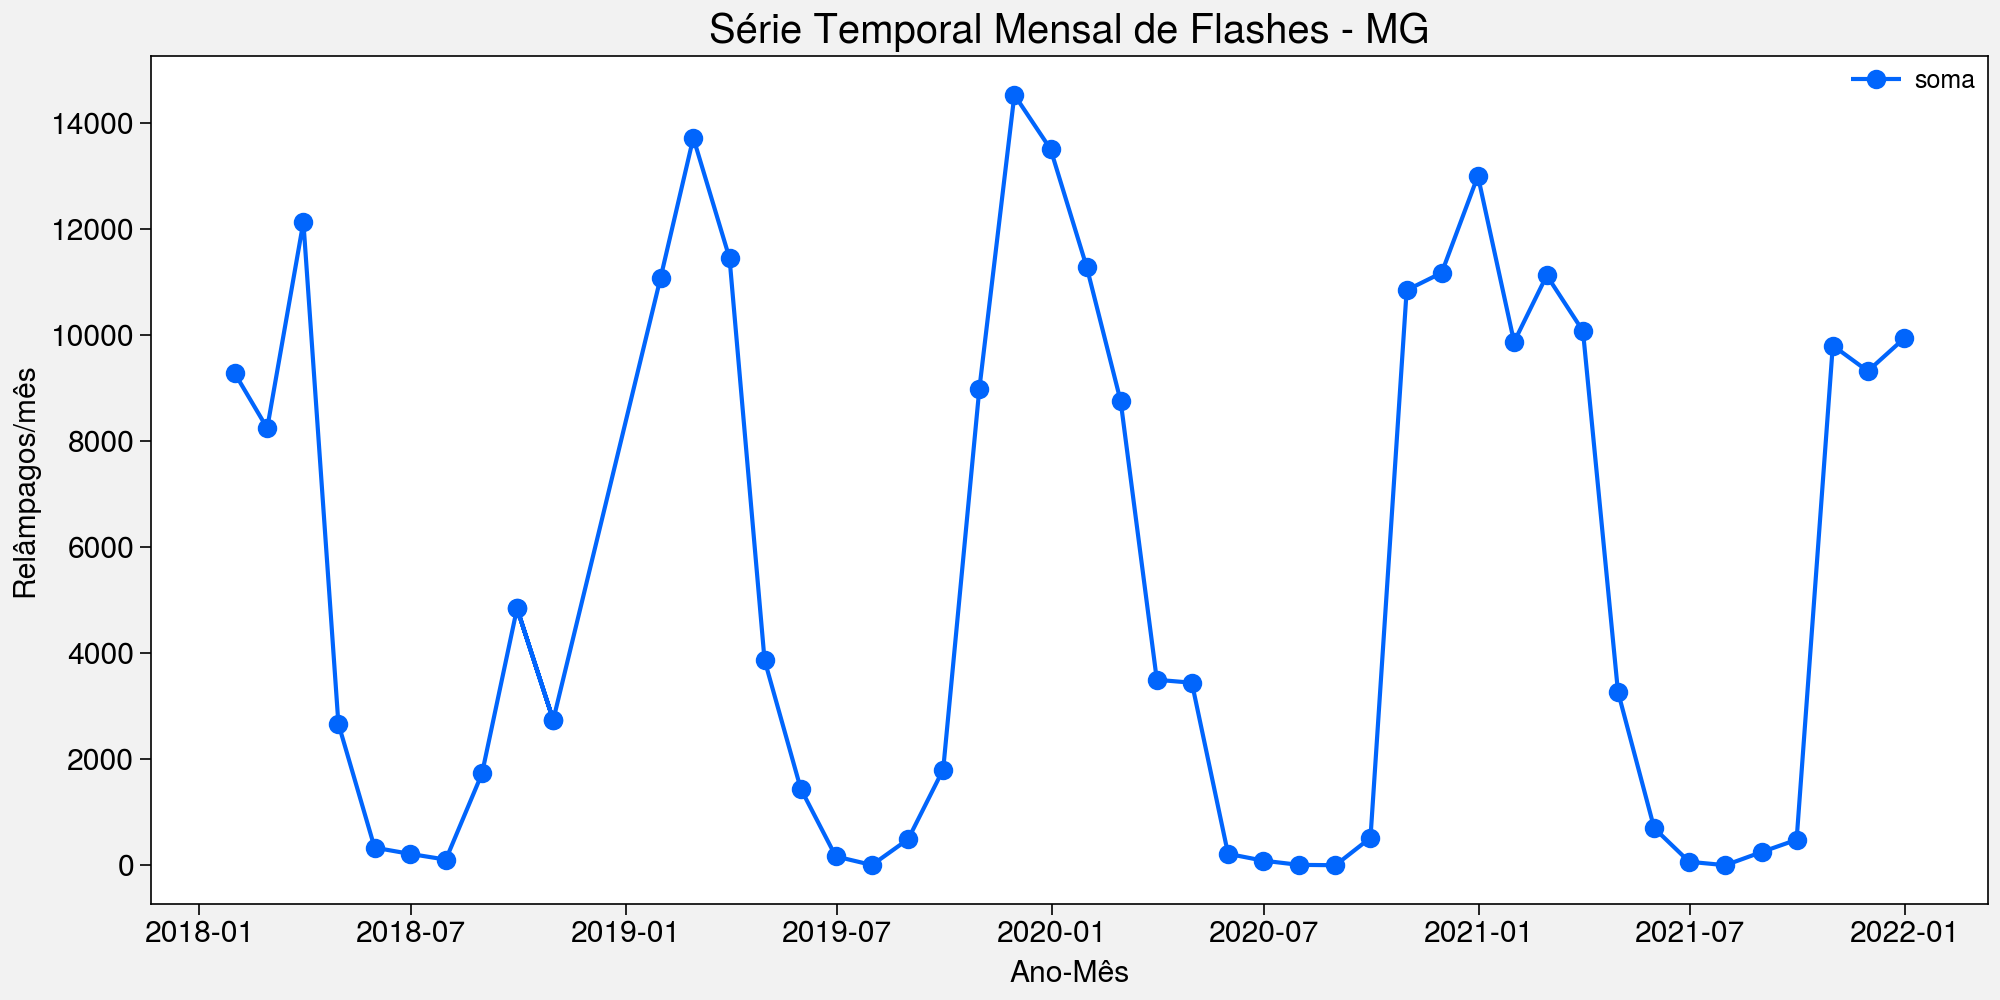

In [ ]:
# moldura da figura
fig, ax = plot.subplots(figsize=(10, 5), tight=True)

# plota figura
ax.plot(serie_temporal_mensal['flash'],
        color='bright blue',
        marker='o',
        label ='soma')

# formato dos eixos
ax.format(xlabel='Ano-Mês', ylabel='Relâmpagos/mês',
          title=f'Série Temporal Mensal de Flashes - {sigla_estado}',
          xrotation=0, xtickminor=False, ytickminor=False,
          small='15px', large='20px', grid=False)

# legenda
ax.legend(frameon=False)

# salva figura
fig.save(f'{dir}output/parte_4/Fig_1_serie_temporal_total_{sigla_estado}.jpg', dpi=300)

##**b) Mensal Total**: gráfico de distribuição (Boxplot).
* Uma outra maneira de representar essa série é através da média mensal de relâmpagos, formando o **ciclo anual** dos relâmpagos na Região.

* Para isso, vamos precisar reorganizar o Índice acima (que nada mais é que um vetor) em uma matriz onde o **número de linhas é o total de anos** e o de **colunas o total de meses**.

* O `NumPy` possui a função `np.reshape()` que permite redefinir as dimensões de `ndarrays` que representem vetores e matrizes.

* A função `np.reshape()` precisa de três argumentos:
    - O `ndarray` que será redefinido;
    - A dimensão total resultante em linhas e colunas;
    - A Ordem computacional com que a função fará a reorganização.

In [ ]:
# reformata os dados
flash_ano_mes = np.reshape(np.array(serie_temporal_mensal['flash']), (4, 12), order='C')

In [ ]:
# mostra o novo dado
flash_ano_mes

array([[9.28825000e+03, 8.24428125e+03, 1.21344219e+04, 2.66845312e+03,
        3.31468750e+02, 2.14921875e+02, 1.05593750e+02, 1.73020312e+03,
        4.84560938e+03, 2.73834375e+03, 4.84560938e+03, 2.73834375e+03],
       [1.10868594e+04, 1.37231250e+04, 1.14527031e+04, 3.87103125e+03,
        1.44376562e+03, 1.66046875e+02, 3.53125000e+00, 4.90546875e+02,
        1.80415625e+03, 8.99112500e+03, 1.45325781e+04, 1.35090625e+04],
       [1.12808125e+04, 8.75796875e+03, 3.49825000e+03, 3.44267188e+03,
        2.14937500e+02, 8.62812500e+01, 6.09375000e+00, 0.00000000e+00,
        5.17078125e+02, 1.08486719e+04, 1.11761875e+04, 1.30040625e+04],
       [9.87187500e+03, 1.11270625e+04, 1.00780156e+04, 3.27098438e+03,
        6.99515625e+02, 6.48281250e+01, 3.28125000e-01, 2.48000000e+02,
        4.80234375e+02, 9.80409375e+03, 9.32101562e+03, 9.93729688e+03]],
      dtype=float32)

In [ ]:
# mostra o tipo dos dados
type(flash_ano_mes)

numpy.ndarray

* Agora que temos a matriz pronta, vamos representar o ciclo anual de duas maneiras:
    - Como um gráfico de barras;
    - Como *boxplots*.
    
* Para o gráfico de barras, precisamos apenas calcular a média aritmética em cada coluna. Basta utilizar a função `.mean(axis=0)`, onde o `axis=0` diz para o `NumPy` a ordem da média que ele deve fazer.

* Para o boxplot, basta usar a função `ax.boxplot[]` do `Proplot`.

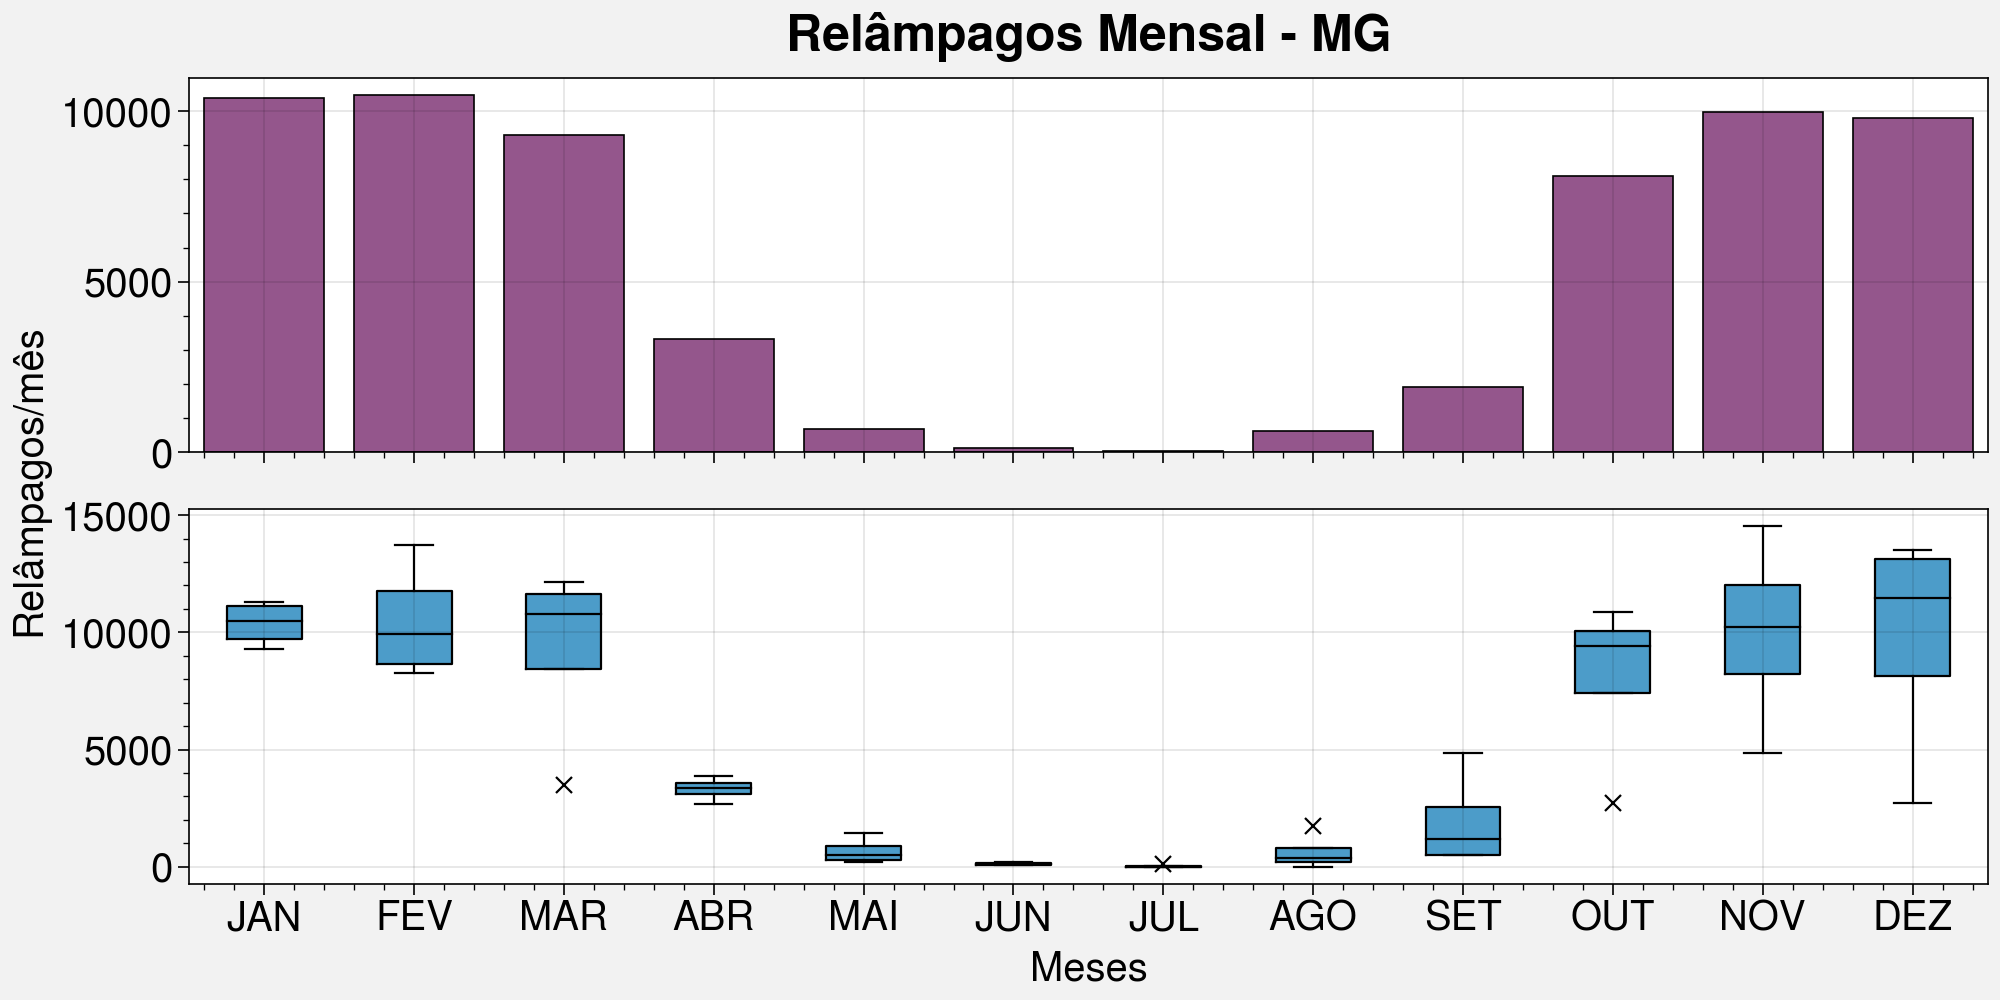

In [ ]:
# cria a moldura da figura
fig, ax = plot.subplots(figsize=(10, 5), nrows=2, tight=True)

# plota o gráfico de barras: relâmpagos mensal médio
ax[0].bar(plot.arange(1, 12, 1), flash_ano_mes.mean(axis=0), color='Purple')

# plota o gráfico boxplot: distrbuição do valores mensais
ax[1].boxplot(flash_ano_mes, marker='x')

# formato dos eixos da figura
ax.format(suptitle=f'Relâmpagos Mensal - {sigla_estado}',
          xlabel='Meses', ylabel='Relâmpagos/mês',
          small='20px', large='25px',
          xticklabels=['JAN', 'FEV', 'MAR', 'ABR', 'MAI',
                       'JUN', 'JUL', 'AGO', 'SET', 'OUT',
                       'NOV', 'DEZ'],
          xticks=plot.arange(1, 13, 1))

# salva figura
fig.save(f'{dir}output/parte_4/Fig_2_serie_temporal_mensal_{sigla_estado}.jpg', dpi=300)

# **PARTE 4)**: Análise Anual

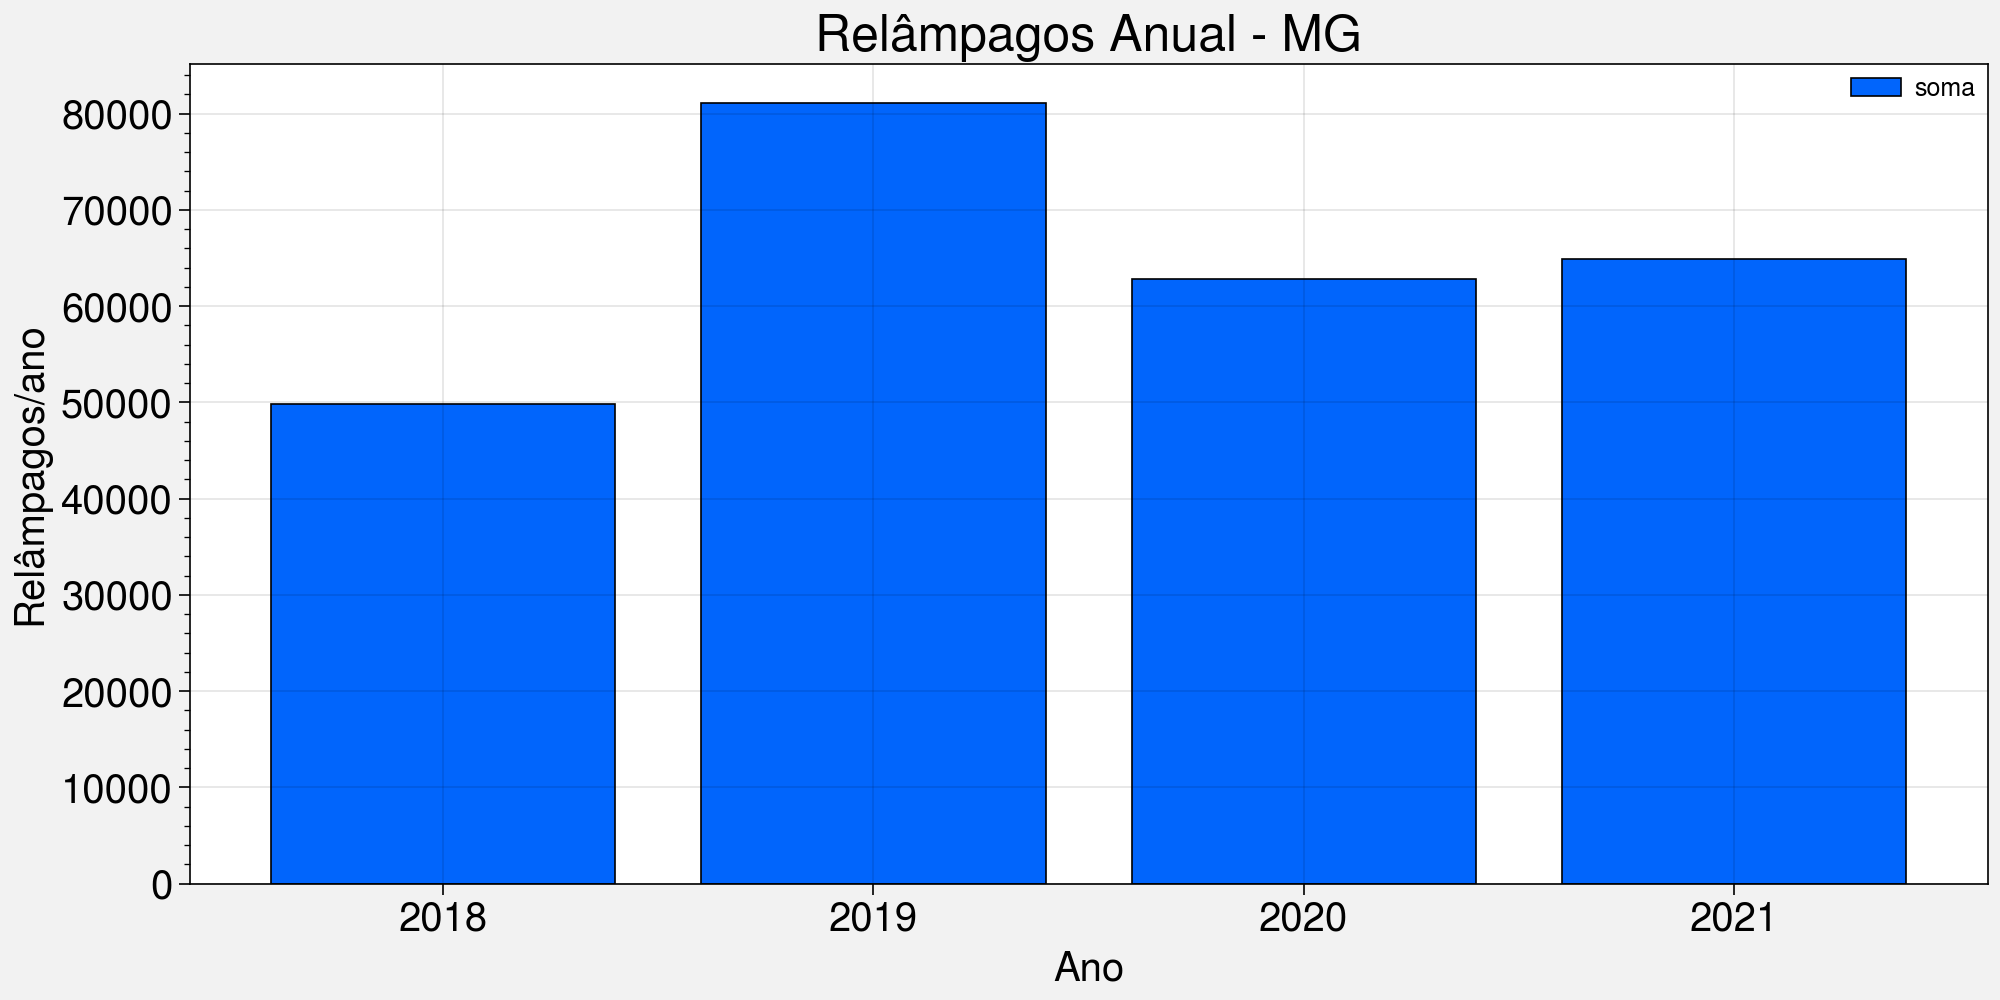

In [ ]:
# moldura da figura
fig, ax = plot.subplots(figsize=(10, 5), tight=True)

# plota figura
ax.bar(plot.arange(1, 4, 1), flash_ano_mes.sum(axis=1),
       color='bright blue',
       label ='soma')

# formato dos eixos da figura
ax.format(title=f'Relâmpagos Anual - {sigla_estado}',
          xlabel='Ano', ylabel='Relâmpagos/ano',
          small='20px', large='25px',
          xtickminor=False,
          xticklabels=['2018', '2019', '2020', '2021'],
          xticks=plot.arange(1, 5, 1))

# legenda
ax.legend(frameon=False)

# salva figura
fig.save(f'{dir}output/parte_4/Fig_3_serie_temporal_anual_{sigla_estado}.jpg', dpi=300)